<a href="https://colab.research.google.com/github/RD-India/Data-ML/blob/main/BikeSharing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Step 1. Import modules***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


** Step 2. Reading Dataset and Understanding Data**

In [ ]:
#Read the csv file using pandas
import os
cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))
import csv
with open('eday.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
df = pd.read_csv('eday.csv')

Files in '/content': ['.config', 'eday.csv', 'sample_data']
['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['1', '01-01-2018', '1', '0', '1', '0', '1', '1', '2', '14.110847', '18.18125', '80.5833', '10.749882', '331', '654', '985']
['2', '02-01-2018', '1', '0', '1', '0', '2', '1', '2', '14.902598', '17.68695', '69.6087', '16.652113', '131', '670', '801']
['3', '03-01-2018', '1', '0', '1', '0', '3', '1', '1', '8.050924', '9.47025', '43.7273', '16.636703', '120', '1229', '1349']
['4', '04-01-2018', '1', '0', '1', '0', '4', '1', '1', '8.2', '10.6061', '59.0435', '10.739832', '108', '1454', '1562']
['5', '05-01-2018', '1', '0', '1', '0', '5', '1', '1', '9.305237', '11.4635', '43.6957', '12.5223', '82', '1518', '1600']
['6', '06-01-2018', '1', '0', '1', '0', '6', '0', '1', '8.378268', '11.66045', '51.8261', '6.0008684', '88', '1518', '1606']
['7', '07-01-2018', '1', '0', '1',

# **There are 16 columns and 730 rows in the provided dataset, stored in '/content', stored as eday.csv**

In [ ]:
# calling head() method
# storing in new variable
df_top = df.head()

# display
df_top

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#check the shape
df.shape

(730, 16)

In [ ]:
#check dataframe for null and datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#check the details of numerical data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#check the columns of data
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
#check the size of data
df.size


11680

In [ ]:
#check the datatypes of data
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
#check the axes of data
df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [ ]:
#check the dimensions of data
df.ndim


2

In [ ]:
#check the values of data
df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

# **Inference- 16 columns and 730 rows in the provided dataset -'eday.csv', neither columns have null values.**

# **Step3: Cleaning Data**
3.1 Drop columns that are not useful for analysis
instant is just a row instance identifier.
dteday is removed as available date features like day, month and year in other columns. As for this analysis we will not consider day to day trend in demand for bikes.
casual and registered variables are dropped as the total sum of both describes the target variable cnt, which leads to data leakage.


In [ ]:
#Before the dropping date, let us introduce a day_old variable which indicates how old is the business
df['days_old'] = (pd.to_datetime(df['dteday'],format = '%d-%M-%Y') - pd.to_datetime('01-01-2018',format = '%d-%M-%Y')).dt.days

In [ ]:
#Inspect once
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [ ]:
# Drop instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)
# Drop dteday which is available data features like date-month-year
df.drop(['dteday'], axis = 1, inplace = True)
# Drop casual and registered columns as sum total of both accounts cnt column
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [ ]:
#Inspect data after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [ ]:
#check dataframe for null and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [ ]:
# Inspect frequency of unique values in a column season
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [ ]:
# Inspect frequency of unique values in a column weathersit
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
#Inspect correlation matrix of coefficients between each pair of columns
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.000093
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.998840
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.000573
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.007687
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,0.000985
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.011452
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.051524
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.049985
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.048119
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,-0.110477


# **3.2 Handle missing values**

In [ ]:
# Verification of null counts
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

# **Inference -no null values found**

# **3.3 Handle Outliers**

In [ ]:
# Handle outliers
print(df.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')


In [ ]:
#Print number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old       62
dtype: int64

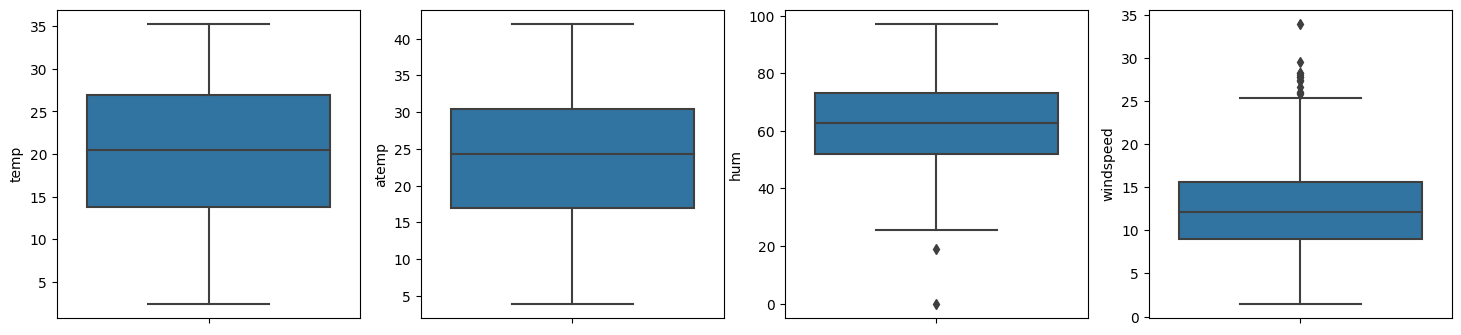

In [ ]:
# Draw box plots for independent variables with continous values
cols = ['temp', 'atemp', 'hum','windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

# **Inference - No outliers to be handled from the provided dataset.**

# **4.Exploratory Data Analysis**
# **4.1 Convert season and weathersit to categorical types**

In [ ]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:"good", 2:"moderate", 3:"bad", 4:"severe"},inplace = True)
df.mnth.replace({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sept", 10:"oct", 11:"nov", 12:"dec"})
df.weekday = df.weekday.replace({0: "sun",1: "mon",2: "tue",3: "wed",4: "thu",5: "fri",6: "sat"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,1,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


**# Draw pairplots for linearity**


<Figure size 1500x3000 with 0 Axes>

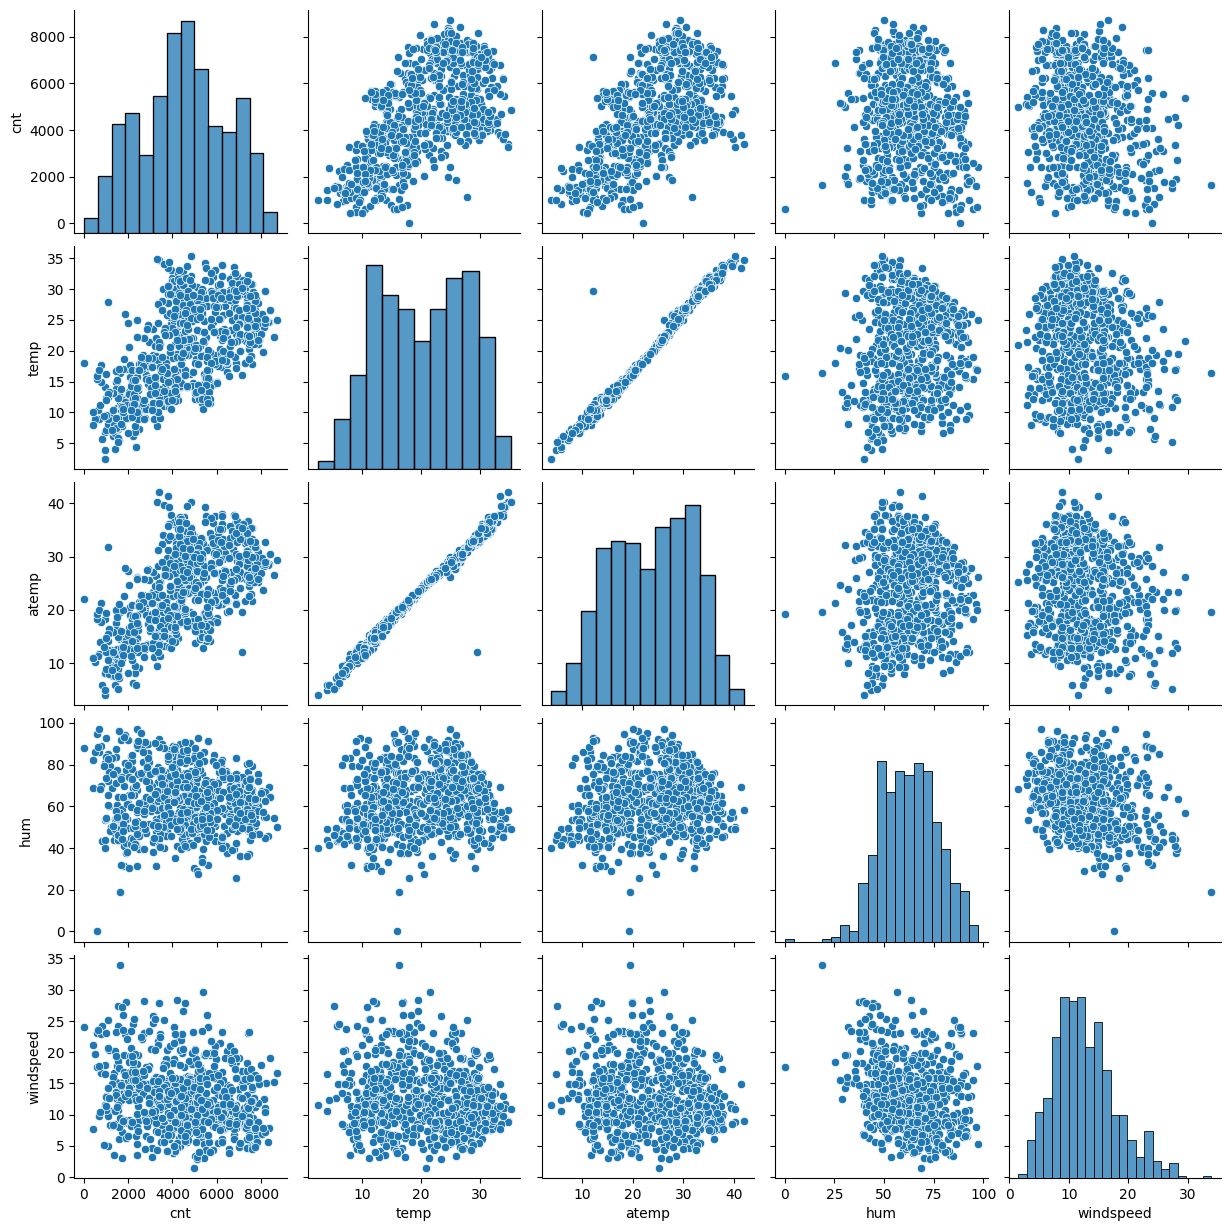

In [ ]:
# Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=["cnt", "temp", "atemp", "hum", "windspeed" ])
plt.show()

# **Inference: Temp and atemp are highly correlated with each other and targer variable cnt.**

## **4.3 Find the Correlation between the Numerical Variable using data visualization**
           
          

<Figure size 2000x1500 with 0 Axes>

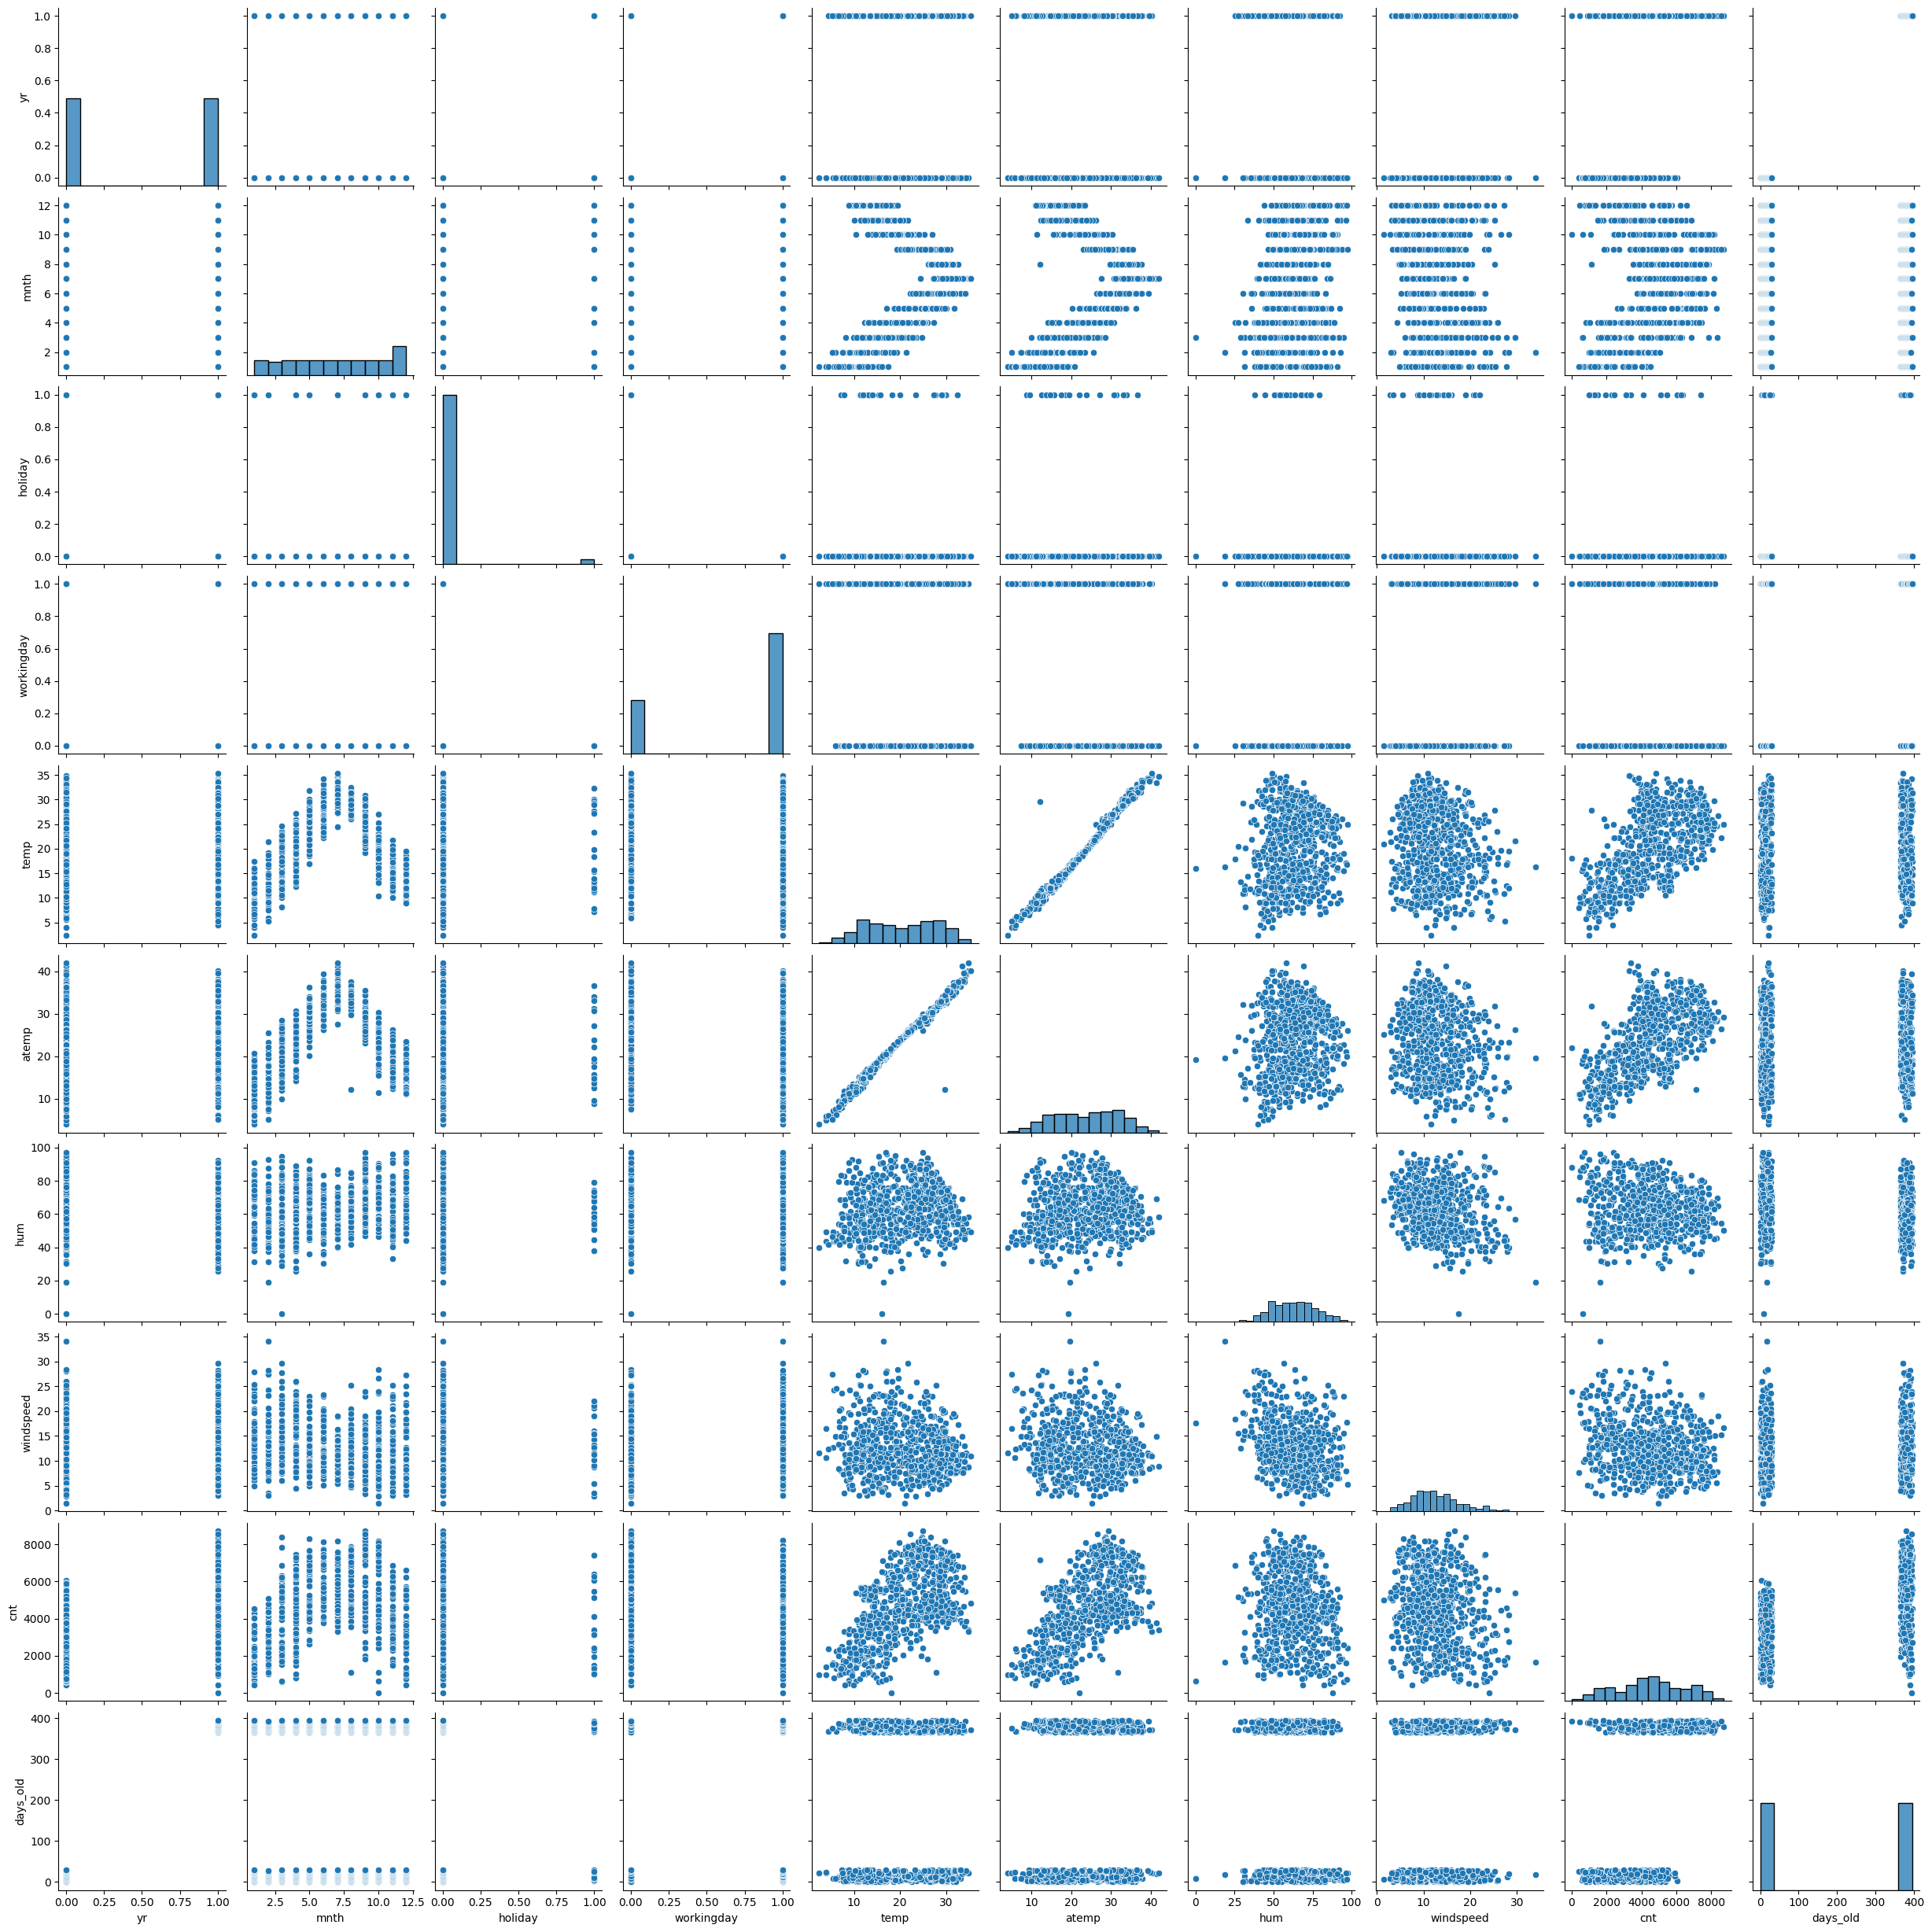

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

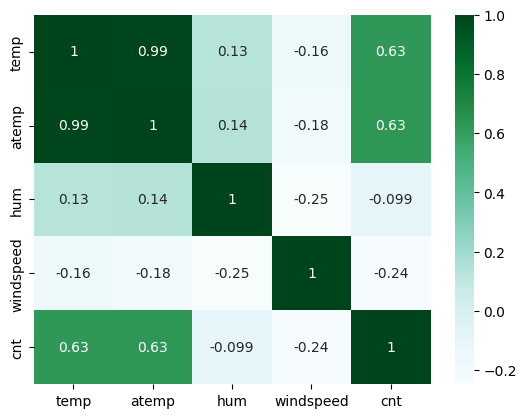

In [ ]:
# Checking continuous variables relationshipwith each other
sns.heatmap(df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), cmap='BuGn', annot = True)
plt.show

## **Temp is highly correlated almost 1 and 0.99, atemp derived from temp.
So atemp field can be dropped. **

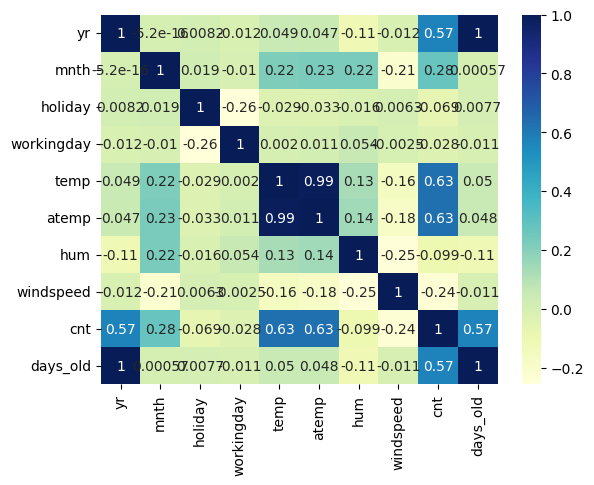

In [ ]:
# Correlation for numeric variables
cor=df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot =True)
plt.show()

# **Draw Heatmap of correlation between variables**

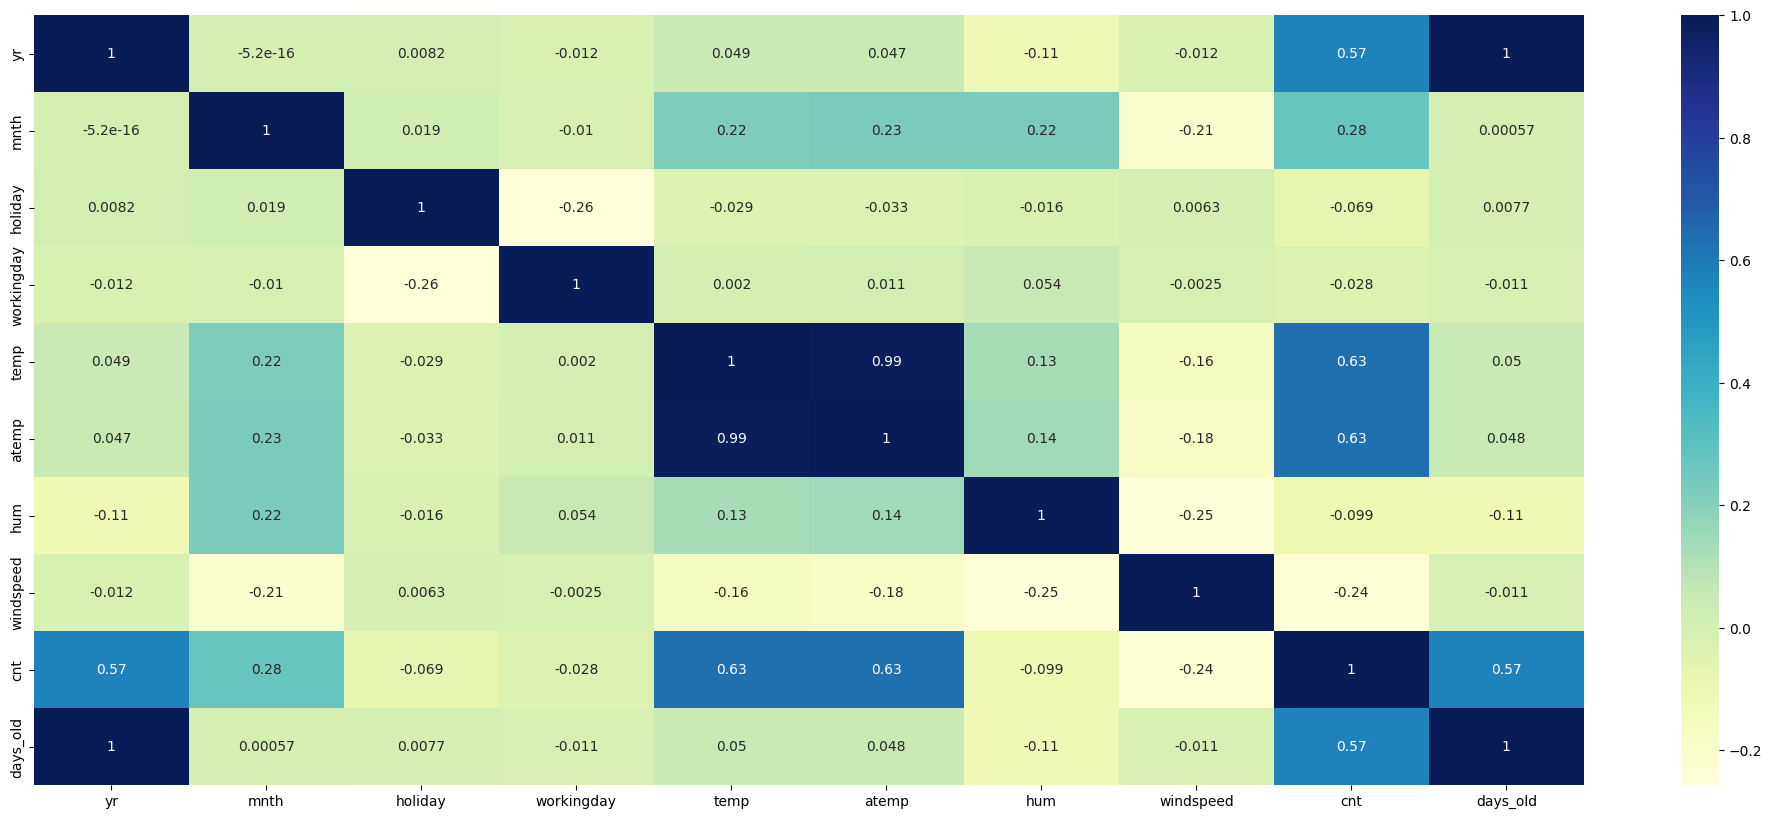

In [ ]:
#Calculate Correlation
corr = df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.



4.5 Analysing Categorical Variabels with target variables

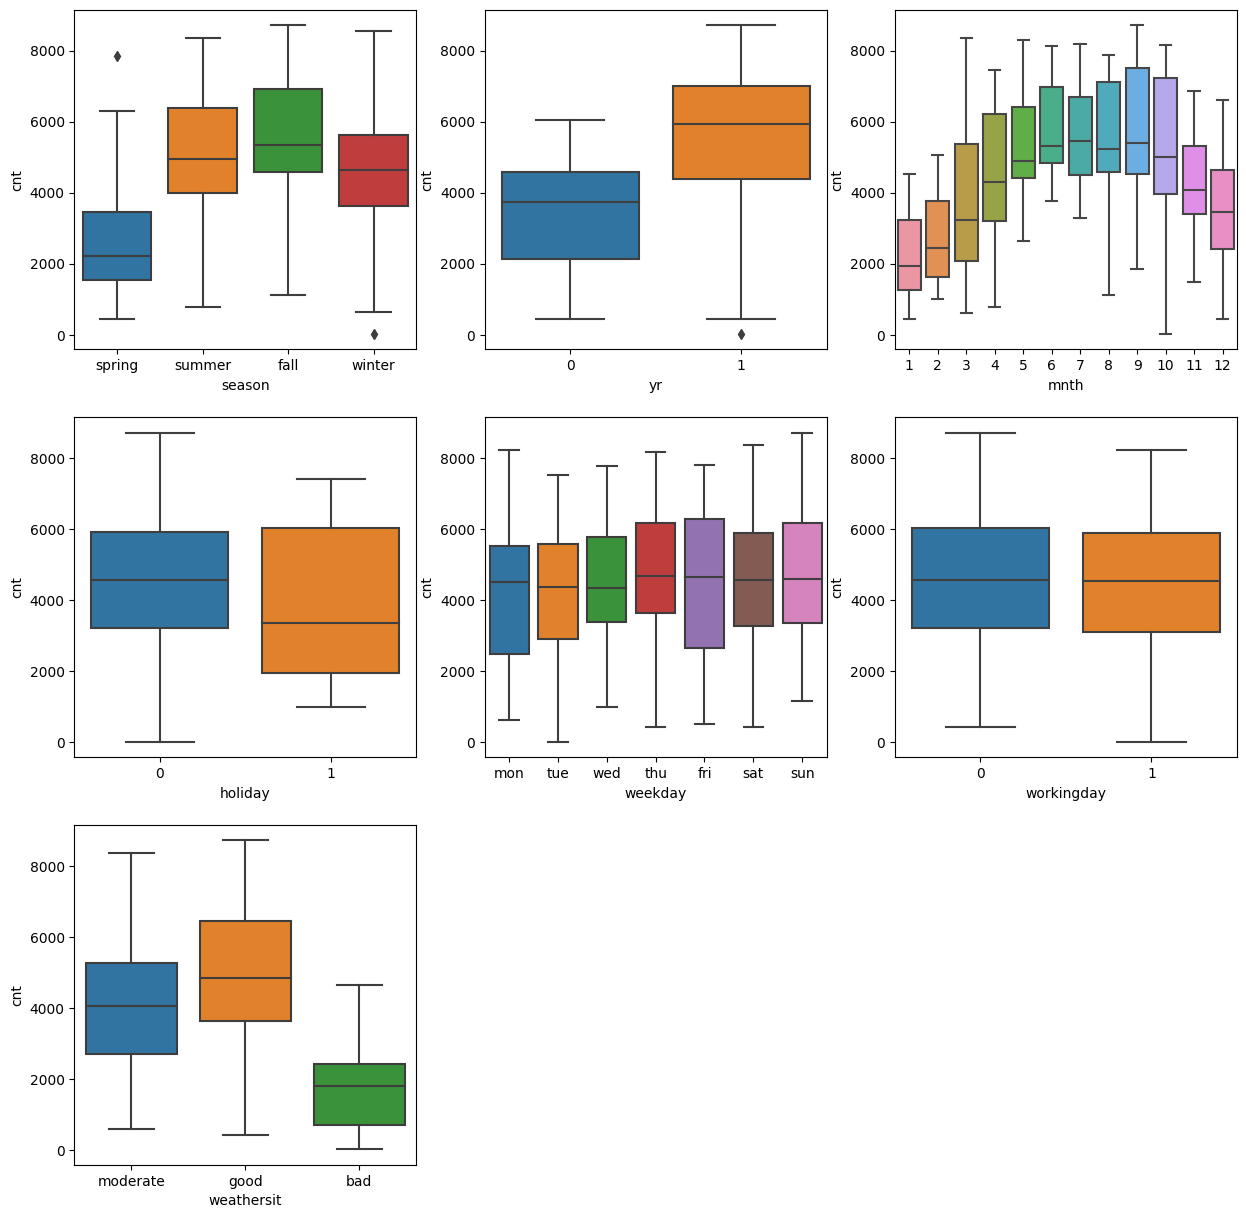

In [ ]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

Inference

Here many insights can be drawn from the plots

1. Demand for next year has grown
2. Fall has highest demand for rental bikes.
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing.
4. When there is a holiday, demand has decreased.
5. Weekday is not giving a clear picture about demand.
6. The clear weathersit has highest demand.
7. During September, bike sharing is more. During the end and beginning of year, it is less.

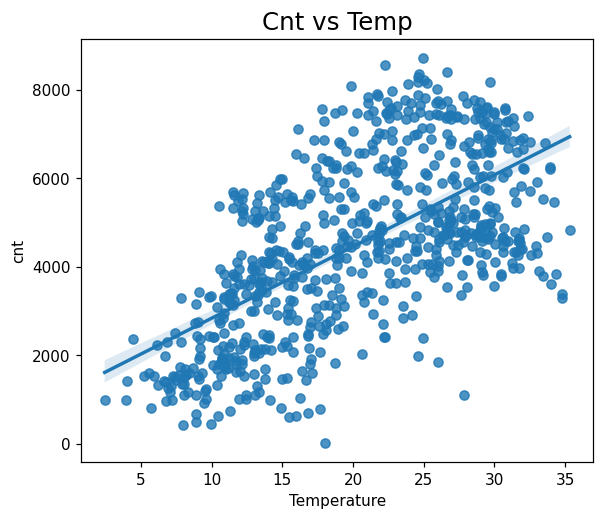

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Inference:
Demand for bikes positively correlated to temp.
We can see that cnt is linearly increasing with temp indicating linear relation.

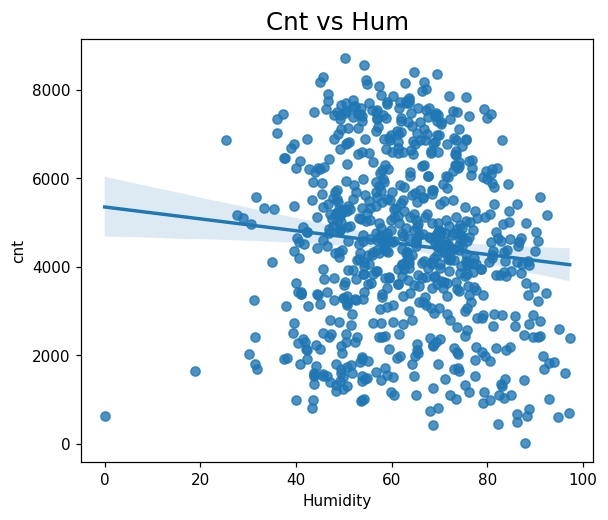

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Inference:
Hum values are more scattered.
Although we can see cnt decreasing with increase in humidity.

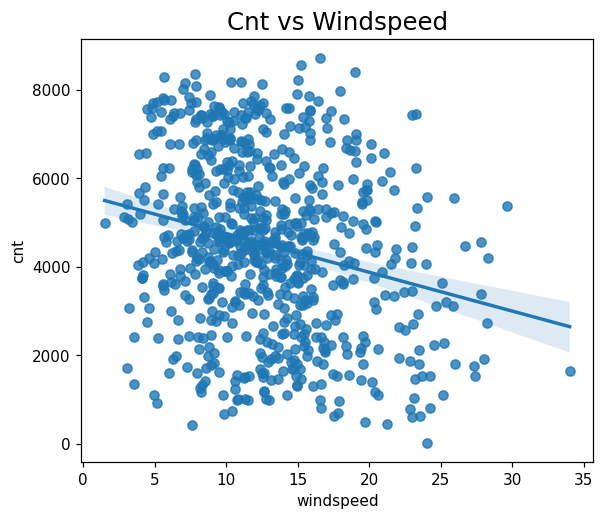

In [ ]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

Inference:
Windspeed is values are more scattered around.
Although we can see cnt decreasing with increase in windspeed.

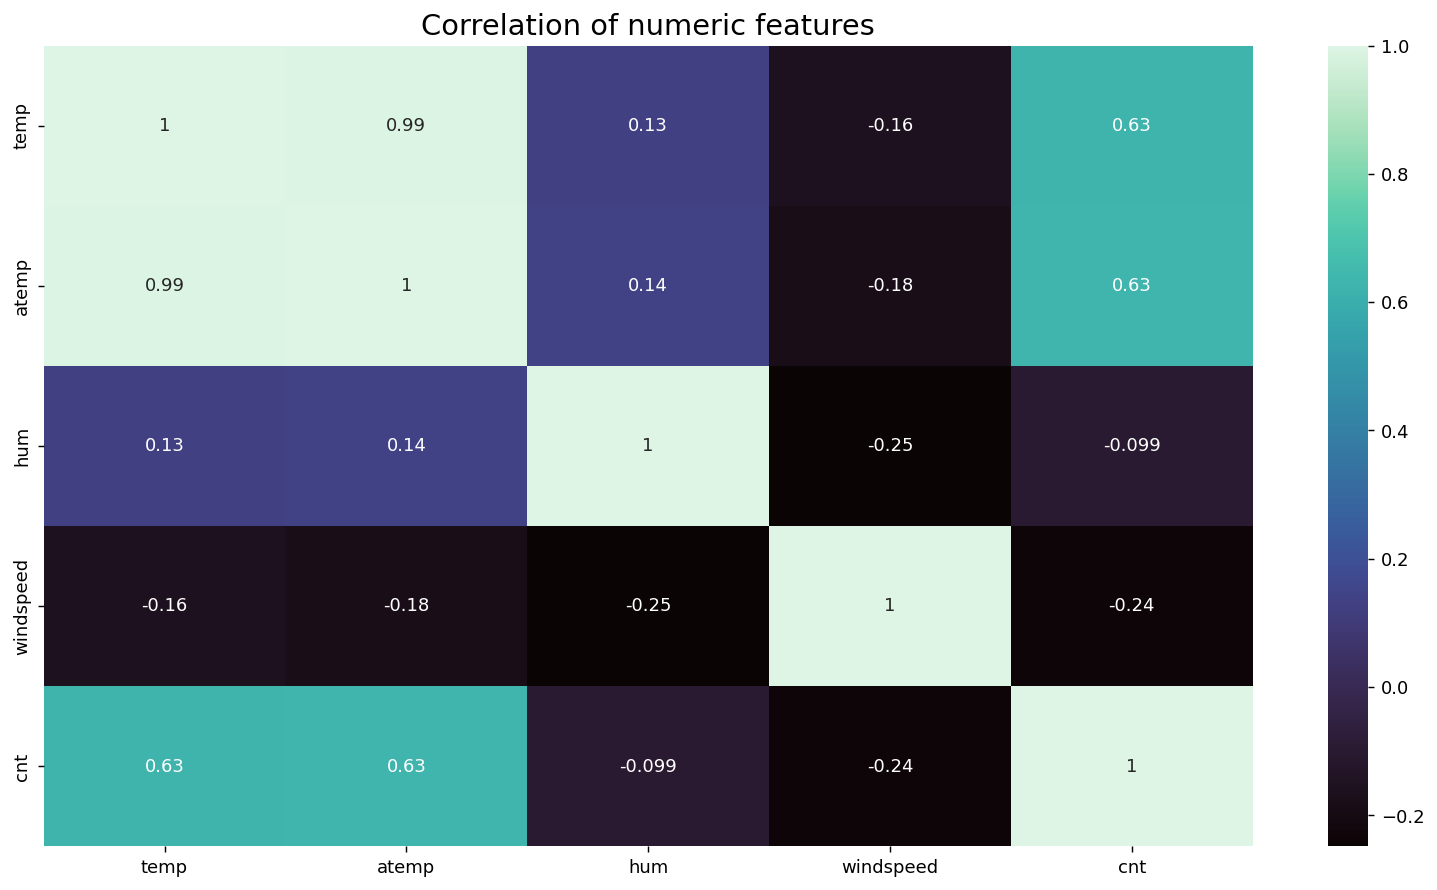

In [ ]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()

Inference_:
Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
Temp and Atemp also have high correlation with cnt variable.

In [ ]:
df.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,197.220548
std,0.500343,3.450215,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,182.837134
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,15.000000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,197.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,380.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,395.000000


# **5. Data Preparation for Linear Regression**
5.1 Create dummy variables for all categorical variables

Dropping the first columns as (p-1) dummies can explain p categories.
In weathersit first column not dropped so as to not lose the info about severe weather situation.

In [ ]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [ ]:
#Print columns after creating dummies
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [ ]:
#Print few rows to inspect
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# **6.Model Building**
6.1 Split Data into training and test

In [ ]:
# Checking shape before splitting
df.shape

(730, 32)

In [ ]:
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


6.2 Feature Scaling continuous variables

In [ ]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [ ]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.517447,0.230920,0.258317,...,0.074364,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.462520,0.421834,0.438138,...,0.262619,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.035443,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.924051,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.962025,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.959494,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.941772,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.030380,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.065823,1,0,...,1,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.929114,0,0,...,0,0,0,0,1,0,0,0,0,1


# **6.3 Build a Model using RFE and Automated approach**
# Use RFE to eliminate some columns

In [ ]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [ ]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 16),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', False, 8),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 13),
 ('mnth_5', False, 10),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', False, 12),
 ('mnth_10', True, 1),
 ('mnth_11', False, 17),
 ('mnth_12', False, 7),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 15),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 5),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

6.4 Manual elimination

In [ ]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_3', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [ ]:


# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'season_winter', 'mnth_2',
       'mnth_4', 'mnth_5', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [ ]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_3', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate']]

In [ ]:
X_train_rfe.shape

(511, 15)

# **7.Model Building**

7.1 Model 1 - Start with all variables selected by RFE

In [ ]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2', 'mnth_7', 'mnth_9', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']


build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.65e-181
Time:                        22:11:51   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8369.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2795.1036    

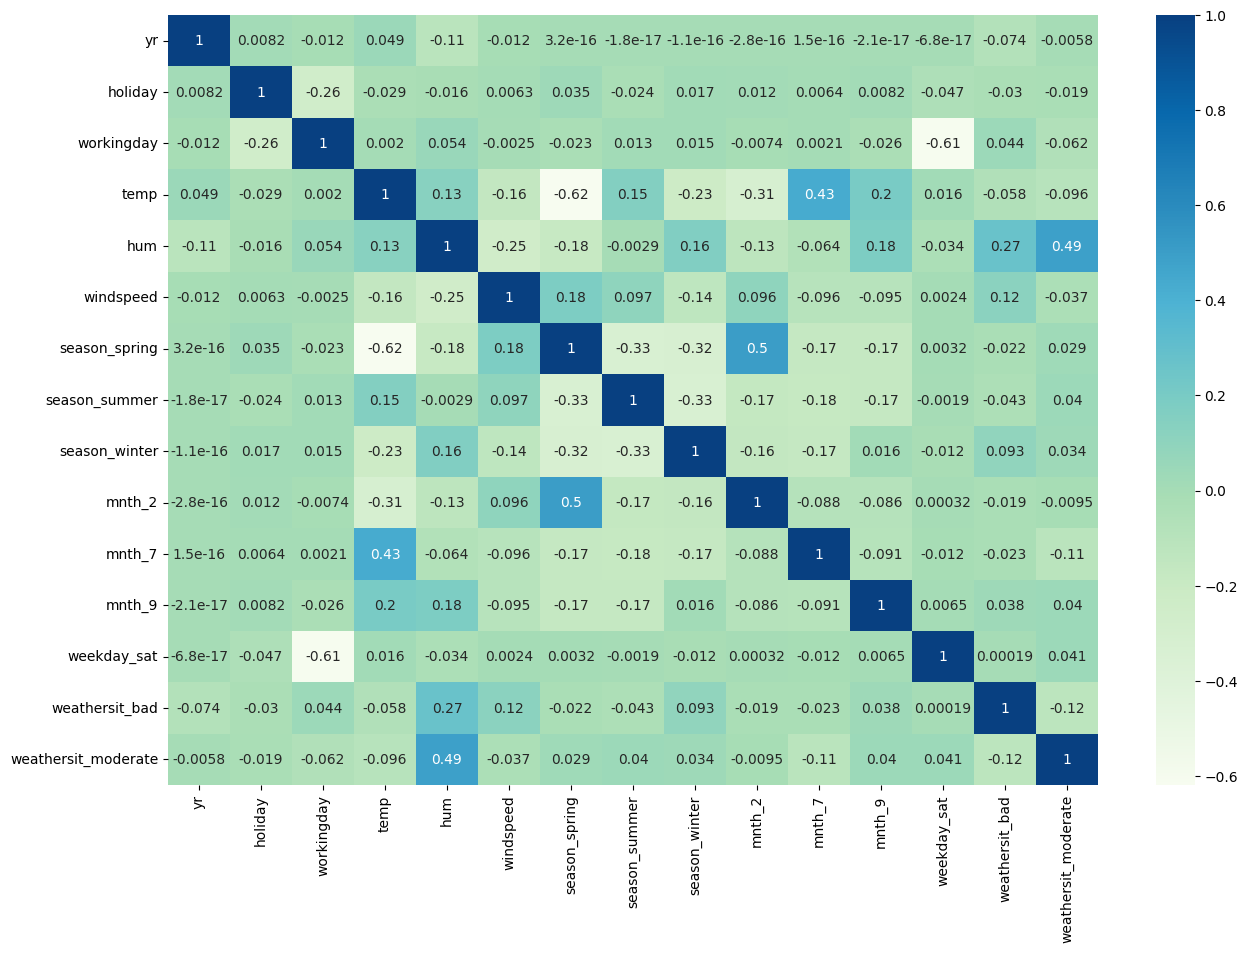

In [ ]:
# Checking correlation of features selected by RFE with target column.
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2', 'mnth_7', 'mnth_9', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

Model 2

In [ ]:
# Dropping the variable weekday_sat as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2', 'mnth_7', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.40e-182
Time:                        22:39:08   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8364.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2756.9544    

Model 3 -hum is considered as per VIF

In [ ]:
# Dropping the variable weekday_sat as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2', 'mnth_7', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.15e-180
Time:                        22:43:39   Log-Likelihood:                -4143.3
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1984.7293    

Model 4- mnth_7 considered

In [ ]:
# Dropping the variable mnth_7 as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2','mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.38e-182
Time:                        22:46:29   Log-Likelihood:                -4137.7
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     497   BIC:                             8363.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2660.0293    

Model 5 -working day considered.

In [ ]:
# Dropping the variable 'workingday' as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'hum', 'temp','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2','mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.24e-183
Time:                        23:20:47   Log-Likelihood:                -4139.9
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     498   BIC:                             8361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2573.4489    

Model 6 -consider hum

In [ ]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.37e-180
Time:                        23:21:13   Log-Likelihood:                -4148.6
No. Observations:                 511   AIC:                             8321.
Df Residuals:                     499   BIC:                             8372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1766.1577    

Model 7 --temp i sconsidered


In [ ]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.70e-148
Time:                        23:22:11   Log-Likelihood:                -4227.1
No. Observations:                 511   AIC:                             8476.
Df Residuals:                     500   BIC:                             8523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5079.2501    

Model 8 -season_summer is considered

In [ ]:
# Dropping the variable season summer as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
       'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.14e-148
Time:                        23:22:38   Log-Likelihood:                -4228.9
No. Observations:                 511   AIC:                             8478.
Df Residuals:                     501   BIC:                             8520.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4979.8119    

Model 8 --holiday is considered

In [ ]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr','windspeed', 'season_spring',
       'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.62e-148
Time:                        23:23:50   Log-Likelihood:                -4233.1
No. Observations:                 511   AIC:                             8484.
Df Residuals:                     502   BIC:                             8522.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4958.3176    

Inference
The R-squared value of the model is 0.755, which indicates that 75.5% of the variance in the dependent variable can be explained by the independent variables 1.
The F-statistic value of 193.6 and the corresponding p-value of 4.62e-148 suggest that the model is statistically significant 1.
The coefficients of the independent variables are significant as well, as their corresponding p-values are less than 0.05
The VIF of windspeed is 2.60
Hence, choose a residual analysis

In [ ]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [ ]:
#Let us build the finalmodel using sklearn
cols = ['yr','windspeed', 'season_spring',
       'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

4958.317603326886 [ 2048.48818478 -1201.24379561 -2727.76029823  -430.25470463
   175.66595529   749.54485835 -2376.55071821  -711.49230088]


# **8.Model Evaluation**
8.1 Residual Analysis

In [ ]:
y_train_pred = lr.predict(X_train[cols])


In [ ]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

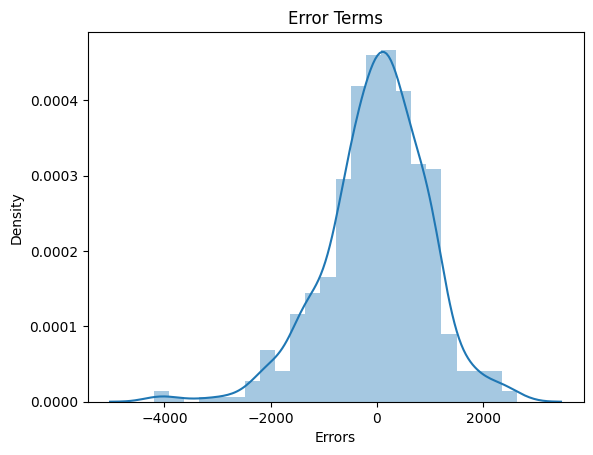

In [ ]:
plot_res_dist(y_train, y_train_pred)

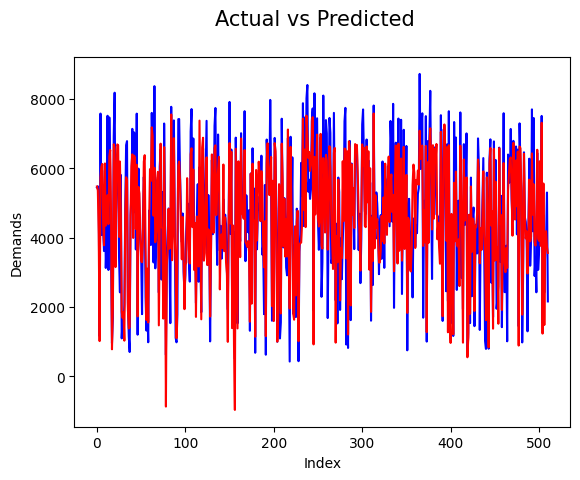

In [ ]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems fine

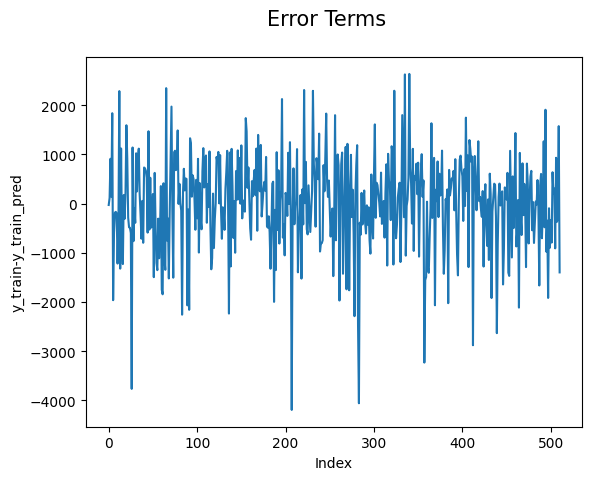

In [ ]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Error terms are independent of each other

In [ ]:
#Print R-squared Value
r2_score(y_train,y_train_pred)


0.7551860000042647

R2 is same as obtained in model 8.

8.2 Linearity check

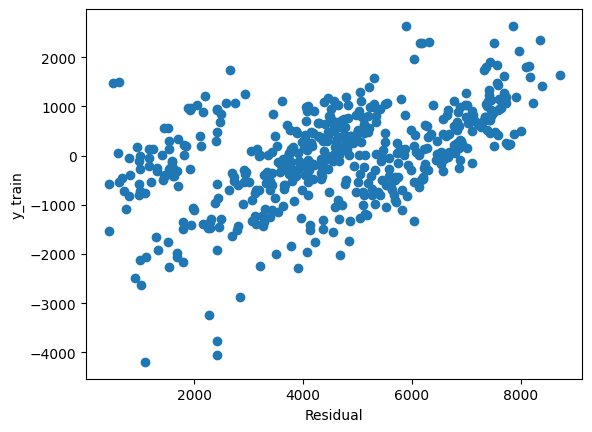

In [ ]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

Predict value for test data

In [ ]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
#Columns from our final model
cols = ['yr','windspeed', 'season_spring',
       'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

8.4 R-Squared value for test predictions

In [ ]:
# Find out the R squared value between test and predicted test data sets.
r2_score(y_test,y_test_pred)

0.7282922899231855

Inference
R2 value for predictions on test data (0.72) is almost same as R2 value of train data(0.75). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

8.5 Homoscedacity

Text(0, 0.5, 'y_test_pred')

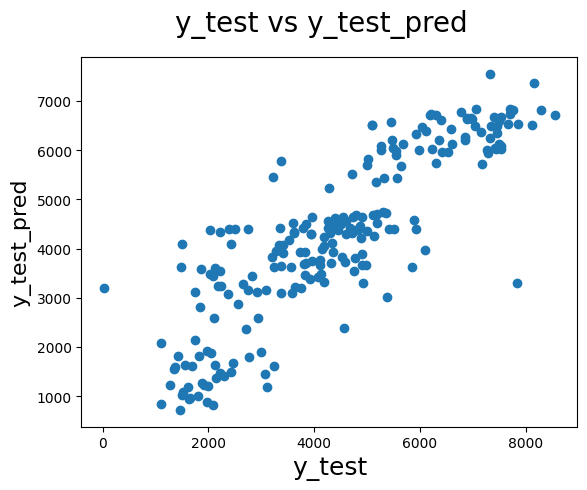

In [ ]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

Inference
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

 8.6 Plot Test vs Predicted test values

In [ ]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

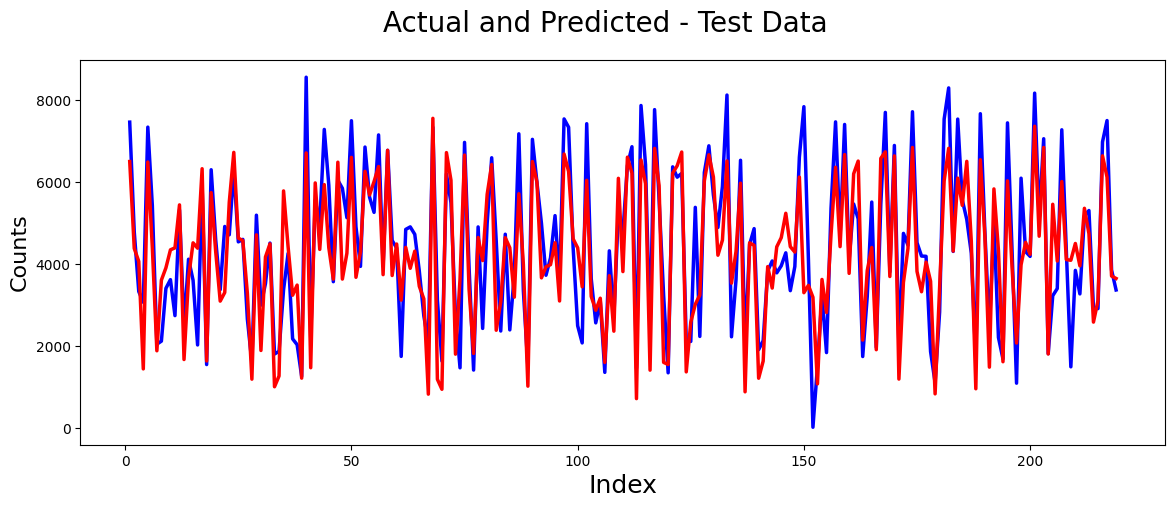

In [ ]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

The variation of test data with actuals is very close.

8.7 Plot error terms for test data

In [ ]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-la

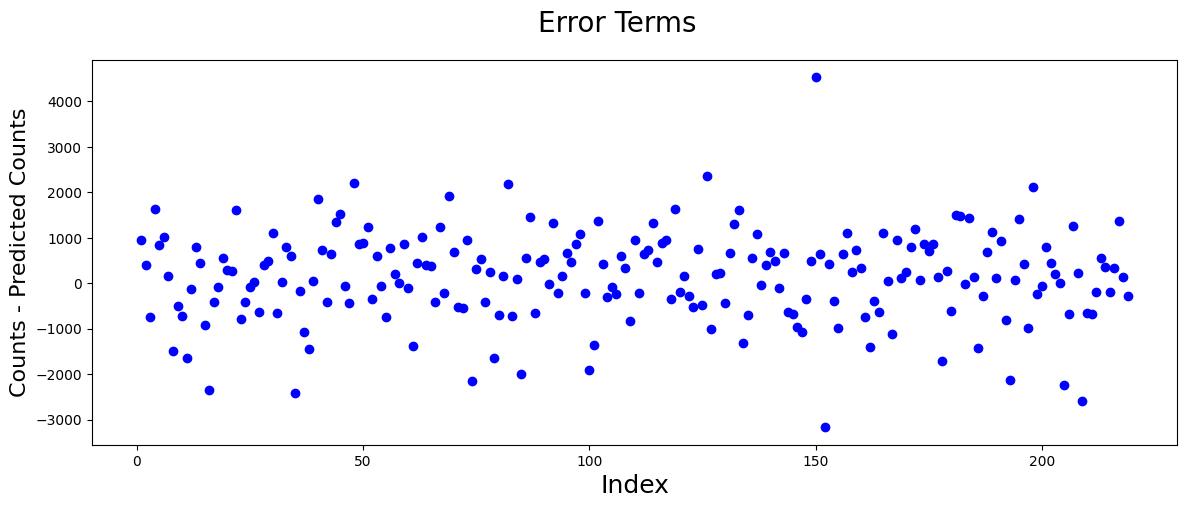

In [ ]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)


Inference
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

**9. Making Predictions**

In [ ]:
# Checking data before scaling
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


9.1 Intrepretting the Model
Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [ ]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr','windspeed', 'season_spring',
       'season_winter', 'mnth_2', 'mnth_9',
       'weathersit_bad', 'weathersit_moderate']
lm = build_model(cols)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.62e-148
Time:                        23:41:45   Log-Likelihood:                -4233.1
No. Observations:                 511   AIC:                             8484.
Df Residuals:                     502   BIC:                             8522.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4958.3176    

# **Interpretation of the result**

Analysing the above model, the comapany should focus on the following features:
1.Season spring and month of july could be the focus for growth and expansion.
2.More cabs near to landmarks for ease commuting by main customers.
3.Planning for more sharing bikes to stations must consider the peak rental hours.
4.Promotions of bike during fall and winters. Data about the most used routes can help build roads/lanes dedicated to bikes specifically.

Findings per model:
Based on previous data it is expected to have a boom in number of users once situation comes back to normal.The R-squared value of the model is 0.755, which indicates that the model explains 75.5% of the variance in the dependent variable.
The F-statistic of the model is 193.1, and the p-value of the F-statistic is 2.33e-179, which indicates that the model is statistically significant.
The coefficient of determination (adjusted R-squared) is 0.815, which is a measure of how well the model fits the data.

There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for July and September as this is when business would be at its best.
Conclusion
Similarly, the variables season_spring, mnth_jul, season_winter, mnth_sept, weekday_sun, weathersit_bad, weathersit_moderate, and temp are also statistically significant in predicting the dependent variable.